#HW1 Мельчук А.Б.

1. Добиться вразумительного результата от модели, собранной на занятии (3
угаданные картинки из 4 предложенных на семинаре). Варианты изменений:
a. изменение слоёв и их количества;
b. изменение метода оптимизации;
c. изменение процесса обучения;
d. для продвинутых: преобразование данных.
2. Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме,
как обучали модель в конце занятия.
3. Переписать эту программу на PyTorch:

Не забудьте про реализацию функции forward!

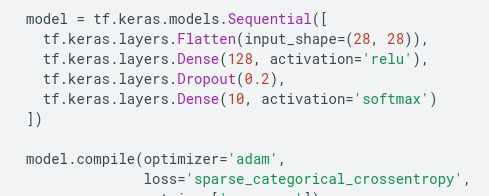

In [1]:
import torch
from torch import nn 
from torch import optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets

import matplotlib.pyplot as plt

import numpy as np

# 1

In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Средства аугментации данных не принесли значительного улучшения в качество модели, по-этому от них решил отказаться

In [3]:
transforms_pytorch = transforms.Compose([
    transforms.ToTensor(),
#     transforms.ColorJitter(hue=.05, saturation=.05),
#     transforms.RandomHorizontalFlip()
])

In [35]:
train_dataset = datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms_pytorch, 
                                             download=False)

test_dataset = datasets.CIFAR10(root='../../data/test', train=False,
                                       download=False, transform=transforms.ToTensor())


In [5]:
train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=10,
                                         shuffle=False)

Дополним свёрточную часть сети ещё одним слоем, и уменьшим размер фильтра. Так же добавим dropout нормализацию полносвязным слоям сети.

In [25]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dpo1 = nn.Dropout(0.2)
        self.dpo2 = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32 * 2 * 2)
        x = self.dpo1(F.relu(self.fc1(x)))
        x = self.dpo2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

Поменяем алгоритм оптимизации, и чуть увеличим его шаг.

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [27]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 3, 3])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 3, 3])
conv2.bias  \  torch.Size([16])
conv3.weight  \  torch.Size([32, 16, 3, 3])
conv3.bias  \  torch.Size([32])
fc1.weight  \  torch.Size([120, 128])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


Увеличим количество эпох обучения до 20

In [28]:
for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.316
[1,   601] loss: 0.278
[2,     1] loss: 0.001
[2,   301] loss: 0.254
[2,   601] loss: 0.245
[3,     1] loss: 0.001
[3,   301] loss: 0.233
[3,   601] loss: 0.225
[4,     1] loss: 0.001
[4,   301] loss: 0.218
[4,   601] loss: 0.214
[5,     1] loss: 0.001
[5,   301] loss: 0.207
[5,   601] loss: 0.205
[6,     1] loss: 0.001
[6,   301] loss: 0.200
[6,   601] loss: 0.198
[7,     1] loss: 0.001
[7,   301] loss: 0.193
[7,   601] loss: 0.194
[8,     1] loss: 0.001
[8,   301] loss: 0.189
[8,   601] loss: 0.187
[9,     1] loss: 0.001
[9,   301] loss: 0.186
[9,   601] loss: 0.183
[10,     1] loss: 0.001
[10,   301] loss: 0.179
[10,   601] loss: 0.181
[11,     1] loss: 0.001
[11,   301] loss: 0.178
[11,   601] loss: 0.177
[12,     1] loss: 0.001
[12,   301] loss: 0.176
[12,   601] loss: 0.173
[13,     1] loss: 0.001
[13,   301] loss: 0.171
[13,   601] loss: 0.172
[14,     1] loss: 0.001
[14,   301] loss: 0.169
[14,   601] loss: 0.170
[15,     1] loss: 0

In [29]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [30]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car


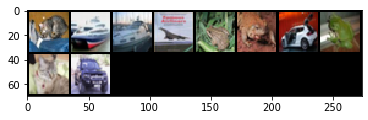

In [31]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [32]:
_, predicted = torch.max(outputs, 1)

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
print('Predicted  : ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted  :    cat  ship  ship plane  deer  frog   car  frog   dog   car


8 / 10

# 2

In [36]:
train_dataset_mnist = datasets.MNIST(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)

test_dataset_mnist = datasets.MNIST(root='../../data/test', train=False,
                                       download=False, transform=transforms.ToTensor())


In [15]:
image, label = train_dataset_mnist[0]
print (image.size())
print (label)

torch.Size([1, 28, 28])
5


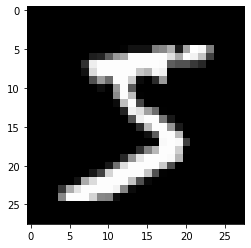

In [16]:
plt.imshow(np.squeeze(image.permute(1, 2, 0).numpy()), cmap='gray')

In [17]:
train_loader_mnist = DataLoader(dataset=train_dataset_mnist,
                                           batch_size=64, 
                                           shuffle=True)

test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=10,
                                         shuffle=False)

In [18]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dpo1 = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.dpo1(F.relu(self.fc1(x)))
        x = F.softmax(self.fc2(x))
        return x


net = Net().to('cpu')

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [20]:
for epoch in range(5):  
    running_loss = 0.0
    correct = 0
    for i, data in enumerate(train_loader_mnist, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        
        # считаем количество правильных предсказаний для

        correct += (labels == predicted).sum()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
#     считаем метрику accyracy на каждой эпохе
    accuracy = 100 * correct / len(train_dataset_mnist)
    print("Accuracy = {}".format(accuracy))

print('Training is finished!')

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


[1,     1] loss: 0.001
[1,   301] loss: 0.264
[1,   601] loss: 0.240
[1,   901] loss: 0.234
Accuracy = 85.16500091552734
[2,     1] loss: 0.001
[2,   301] loss: 0.232
[2,   601] loss: 0.231
[2,   901] loss: 0.230
Accuracy = 93.0199966430664
[3,     1] loss: 0.001
[3,   301] loss: 0.229
[3,   601] loss: 0.228
[3,   901] loss: 0.228
Accuracy = 94.59666442871094
[4,     1] loss: 0.001
[4,   301] loss: 0.227
[4,   601] loss: 0.227
[4,   901] loss: 0.226
Accuracy = 95.50166320800781
[5,     1] loss: 0.001
[5,   301] loss: 0.226
[5,   601] loss: 0.226
[5,   901] loss: 0.226
Accuracy = 96.06500244140625
Training is finished!


In [21]:
data_iter = iter(test_loader_mnist)
images, labels = data_iter.next()

In [22]:
outputs = net(images)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [23]:
_, predicted = torch.max(outputs, 1)

print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(10)))
print('Predicted  : ', ' '.join('%5s' % predicted[j]
                              for j in range(10)))

GroundTruth:  tensor(7) tensor(2) tensor(1) tensor(0) tensor(4) tensor(1) tensor(4) tensor(9) tensor(5) tensor(9)
Predicted  :  tensor(7) tensor(2) tensor(1) tensor(0) tensor(4) tensor(1) tensor(4) tensor(9) tensor(6) tensor(9)


Считаем accuracy для тестовой выборки

In [24]:
correct = 0
for i, data in enumerate(test_loader_mnist, 0):
    images, labels = data[0], data[1]

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct += (labels == predicted).sum()
            
accuracy = 100 * correct / len(test_dataset_mnist)
print("Accuracy = {}".format(accuracy))

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Accuracy = 95.70999908447266
